In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
list1 = fits.open('../data/gll_iem_v02_P6_V11_DIFFUSE.fit')
list1;

In [4]:
list1.info()
#we can see that there are 2 HDUs

Filename: ../data/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [5]:
hdu = list1[0]
hdu;

In [6]:
hdu.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [7]:
['30','the 3rd dimension of the primary HDU data','MeV','GLAST','Michelson']

['30',
 'the 3rd dimension of the primary HDU data',
 'MeV',
 'GLAST',
 'Michelson']

In [8]:
data = hdu.data
print(min(data[0][0]))
print(max(data[0][0]))
m = sum(data[0][0])/len(data[0][0])
s = 0
for i in data[0][0]:
    s += (i-m)**2
stdev = (s/len(data[0][0]))**0.5
print(stdev)

1.159198e-07
1.2238715e-07
1.866126308114808e-09


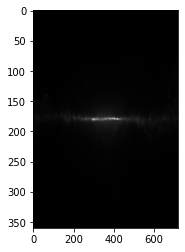

In [26]:
plt.imshow(data[0], cmap='gray', aspect=3)

In [12]:
s1 = [sum(data[5*i]) for i in range(len(data)//5)]
print(s1)

[array([1.50437481e-04, 1.50204680e-04, 1.51065164e-04, 1.52642824e-04,
       1.53097833e-04, 1.51141547e-04, 1.48758365e-04, 1.45609010e-04,
       1.42741002e-04, 1.40312317e-04, 1.37960422e-04, 1.34313566e-04,
       1.31426816e-04, 1.29350883e-04, 1.28534026e-04, 1.29189692e-04,
       1.31668421e-04, 1.35028240e-04, 1.38928561e-04, 1.40407181e-04,
       1.37018433e-04, 1.33335299e-04, 1.32697853e-04, 1.33349517e-04,
       1.30702858e-04, 1.27451713e-04, 1.22637255e-04, 1.19098040e-04,
       1.18172211e-04, 1.17984993e-04, 1.14747912e-04, 1.12272479e-04,
       1.12177615e-04, 1.10243273e-04, 1.06838168e-04, 1.04191429e-04,
       1.03686769e-04, 1.04457351e-04, 1.04902036e-04, 1.05558378e-04,
       1.05421161e-04, 1.04061619e-04, 1.04925086e-04, 1.07352265e-04,
       1.08495151e-04, 1.08207496e-04, 1.08390712e-04, 1.07685613e-04,
       1.10124478e-04, 1.13394213e-04, 1.17090582e-04, 1.19733297e-04,
       1.26987041e-04, 1.25942490e-04, 1.20473451e-04, 1.16366951e-04,
     

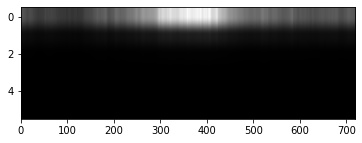

In [22]:
plt.imshow(s1, cmap='gray', aspect=40)

In [19]:
from astropy.coordinates import AltAz, EarthLocation
from astropy import units as u

In [20]:
def altitude(coordinates, time):
    coords = coordinates.transform_to(AltAz(obstime = time+(12-5.5)*u.hour, location = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)))
    coords.alt